In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import tensorflow as tf

print(tf.__version__)

2.11.0


In [4]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
import cv2
import os
import glob
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from scipy.ndimage.filters import convolve
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as prepro_res50

In [5]:
cd '/content/gdrive/MyDrive/AIML/LABS/Computer Vision/Project 2'

/content/gdrive/MyDrive/AIML/LABS/Computer Vision/Project 2


In [6]:
!unzip "PINS.zip" -d ""

Streaming output truncated to the last 5000 lines.
  inflating: PINS/pins_Josh Radnor/Josh Radnor55.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor56.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor57.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor59.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor6.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor60.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor61.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor62.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor63.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor64.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor65.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor66.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor67.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor68.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor69.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor7.jpg  
  inflating: PINS/pins_Josh Radnor/Josh Radnor70.jpg  
  inflating: PIN

In [7]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    

In [8]:
def load_metadata(path):
    metadata = []
    images = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                cur_metadata  = (IdentityMetadata(path, i, f))
                metadata.append(cur_metadata)
                images.append(np.array([f, i, cur_metadata]))
    return (np.array(metadata), np.array(images))

In [9]:
response = load_metadata('PINS')
metadata = response[0]
data     = response[1]
labels = np.array([meta.name for meta in metadata])

In [10]:
data = pd.DataFrame(data, columns=['Name', 'Folder', 'Image'])
data

,Name,Folder,Image
0,Cameron Monaghan26.jpg,pins_Cameron Monaghan,PINS/pins_Cameron Monaghan/Cameron Monaghan26.jpg
1,Cameron Monaghan109.jpg,pins_Cameron Monaghan,PINS/pins_Cameron Monaghan/Cameron Monaghan109...
2,Cameron Monaghan44.jpg,pins_Cameron Monaghan,PINS/pins_Cameron Monaghan/Cameron Monaghan44.jpg
3,Cameron Monaghan84.jpg,pins_Cameron Monaghan,PINS/pins_Cameron Monaghan/Cameron Monaghan84.jpg
4,Cameron Monaghan76.jpg,pins_Cameron Monaghan,PINS/pins_Cameron Monaghan/Cameron Monaghan76.jpg
...,...,...,...
10765,Caity Lotz56.jpg,pins_Caity Lotz,PINS/pins_Caity Lotz/Caity Lotz56.jpg
10766,Caity Lotz17.jpg,pins_Caity Lotz,PINS/pins_Caity Lotz/Caity Lotz17.jpg
10767,Caity Lotz41.jpg,pins_Caity Lotz,PINS/pins_Caity Lotz/Caity Lotz41.jpg
10768,Caity Lotz40.jpg,pins_Caity Lotz,PINS/pins_Caity Lotz/Caity Lotz40.jpg


In [11]:
metadata

array([PINS/pins_Cameron Monaghan/Cameron Monaghan26.jpg,
       PINS/pins_Cameron Monaghan/Cameron Monaghan109.jpg,
       PINS/pins_Cameron Monaghan/Cameron Monaghan44.jpg, ...,
       PINS/pins_Caity Lotz/Caity Lotz41.jpg,
       PINS/pins_Caity Lotz/Caity Lotz40.jpg,
       PINS/pins_Caity Lotz/Caity Lotz21.jpg], dtype=object)

In [12]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [13]:
load_image(metadata[0].image_path())

array([[[169, 151, 131],
        [172, 154, 134],
        [175, 157, 137],
        ...,
        [121,  48,  57],
        [123,  48,  55],
        [127,  48,  54]],

       [[168, 150, 130],
        [172, 154, 134],
        [175, 157, 137],
        ...,
        [124,  54,  64],
        [123,  50,  59],
        [122,  47,  54]],

       [[168, 150, 130],
        [172, 154, 134],
        [175, 157, 137],
        ...,
        [114,  52,  63],
        [122,  54,  65],
        [125,  55,  65]],

       ...,

       [[ 55,  60,  66],
        [ 44,  49,  55],
        [ 51,  55,  64],
        ...,
        [ 44,  40,  39],
        [ 46,  42,  41],
        [ 48,  44,  43]],

       [[ 62,  67,  73],
        [ 51,  56,  62],
        [ 54,  61,  69],
        ...,
        [ 42,  38,  37],
        [ 44,  40,  39],
        [ 46,  42,  41]],

       [[ 66,  71,  77],
        [ 56,  61,  67],
        [ 59,  66,  74],
        ...,
        [ 40,  36,  35],
        [ 42,  38,  37],
        [ 44,  40,  39]]

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [15]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

In [17]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [18]:
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 3s 3s/step
(2622,)


In [19]:
print(embedding_vector)

[ 0.01010475 -0.00256183 -0.00898412 ... -0.02112551 -0.01153834
  0.01406392]


In [20]:
def gen_embed(m):
  img_path = m.image_path()
  img = load_image(img_path)
  
  # Normalising pixel values from [0-255] to [0-1]
  img = (img / 255.).astype(np.float32)
  
  img = cv2.resize(img, dsize = (224,224))
  #print(img.shape)
  
  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  #print(embedding_vector.shape)

  return embedding_vector

# Get for first image
gen_embed(metadata[0])

1/1 [==============================] - 0s 23ms/step


array([ 0.01010475, -0.00256183, -0.00898412, ..., -0.02112551,
       -0.01153834,  0.01406392], dtype=float32)

In [21]:
embeddings = np.zeros((metadata.shape[0], 2622))

print(metadata.size)
for i, m in enumerate(metadata):
  embeddings[i] = gen_embed(m)

print('size of each embedding:', len(embeddings[0]))


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step
size of each embedding: 2622


In [22]:
embeddings[0].shape

(2622,)

In [23]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [24]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize = (8, 3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()))

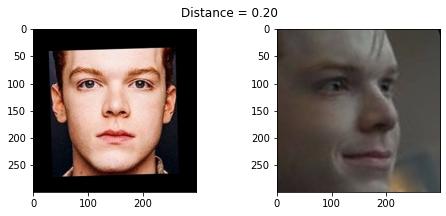

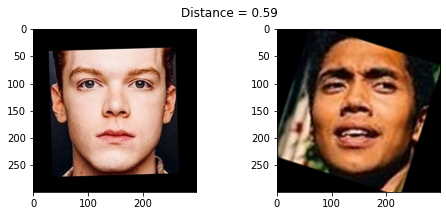

In [25]:
show_pair(2, 3)
show_pair(2, 180)

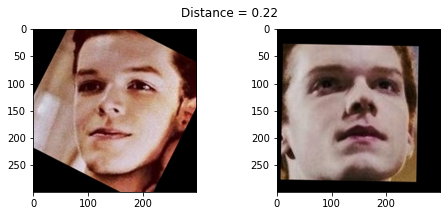

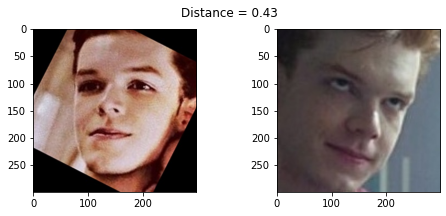

In [26]:
show_pair(30, 31)
show_pair(30, 100)

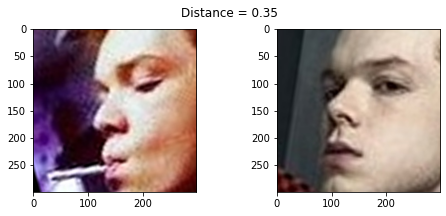

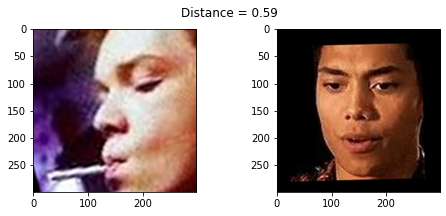

In [27]:
show_pair(70, 72)
show_pair(70, 115)

In [28]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9573, 2622)

(1197, 2622)

(9573,)

(1197,)

In [29]:
from sklearn.preprocessing import LabelEncoder

targets = np.array([m.name for m in metadata])

le = LabelEncoder()
y = le.fit_transform(targets) 
y_train_en = y[train_idx]
y_test_en = y[test_idx]

In [30]:
np.unique(targets)

array(['pins_Aaron Paul', 'pins_Alvaro Morte', 'pins_Amanda Crew',
       'pins_Amaury Nolasco', 'pins_Anna Gunn',
       'pins_Benedict Cumberbatch', 'pins_Betsy Brandt',
       'pins_Brenton Thwaites', 'pins_Brit Marling',
       'pins_Bryan Cranston', 'pins_Caity Lotz', 'pins_Cameron Monaghan',
       'pins_Chance Perdomo', 'pins_Chris Evans', 'pins_Chris Pratt',
       'pins_Cobie Smulders', 'pins_Danielle Panabaker',
       'pins_Dave Franco', 'pins_Dominic Purcell', 'pins_Dwayne Johnson',
       'pins_Emilia Clarke', 'pins_Emily Bett Rickards',
       'pins_Emma Stone', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil',
       'pins_Jason Momoa', 'pins_Jeremy Renner', 'pins_Jesse Eisenberg',
       'pins_Jim Parsons', 'pins_Jon Bernthal', 'pins_Josh Radnor',
       'pins_Kit Harington', 'pins_Krysten Ritter',
       'pins_Kumail Nanjiani', 'pins_Maisie Williams',
       'pins_Mark Ruffalo', 'pins_Martin Starr', 'pins_Melissa benoit',
       'pins_Mike Colter', 'pins_Morena Baccarin', 'p

In [31]:
np.unique(y_train_en)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [32]:
np.unique(y_test_en)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [33]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()

X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_test)

print(X_train)
print(X_train_scal)

[[ 1.18887238e-02 -1.40979700e-03  1.88266523e-02 ... -3.73182585e-04
  -1.50355129e-02  4.37912112e-03]
 [-1.66357309e-03 -9.38906334e-03  9.14318953e-03 ... -1.70195904e-02
   7.43829925e-03  1.64697133e-02]
 [ 9.13218316e-03  4.85474290e-03 -1.16469839e-03 ... -1.34422993e-02
   2.64817127e-03  1.45724192e-02]
 ...
 [-1.72546017e-03 -8.23784340e-03 -2.44021118e-02 ... -1.84006486e-02
   3.59163852e-03  7.85035174e-03]
 [ 1.47766003e-03 -9.46399476e-03 -2.47980631e-03 ... -1.45456856e-02
   6.84965216e-03  1.21086352e-02]
 [ 6.16592821e-04 -6.33495115e-03 -6.93830196e-03 ... -8.95945122e-05
   7.81667419e-03  2.42265295e-02]]
[[ 0.11228006 -0.09352823  1.51644851 ...  1.3278806  -1.97805276
  -0.70386737]
 [-1.30605195 -0.76766102  0.5944466  ... -0.23899308  0.144216
   0.22924002]
 [-0.17620904  0.43573493 -0.38700936 ...  0.097726   -0.30813
   0.08281385]
 ...
 [-1.31252882 -0.67039955 -2.59953806 ... -0.36898772 -0.21903558
  -0.43597057]
 [-0.9773024  -0.77399164 -0.51222613 ..

In [34]:
from sklearn.decomposition import PCA

covMatrix = np.cov(X_train_scal,rowvar=False)
print(covMatrix)

# Eigen values and vector
eig_vals, eig_vecs = np.linalg.eig(covMatrix)

# Cumulative variance explained
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

[[ 1.00010447  0.11644998  0.11113622 ...  0.07975377 -0.12800286
  -0.25281833]
 [ 0.11644998  1.00010447  0.2366124  ... -0.04143457  0.27736507
   0.21429744]
 [ 0.11113622  0.2366124   1.00010447 ... -0.11643248  0.06360444
   0.03936418]
 ...
 [ 0.07975377 -0.04143457 -0.11643248 ...  1.00010447 -0.02362578
  -0.09905504]
 [-0.12800286  0.27736507  0.06360444 ... -0.02362578  1.00010447
   0.39338385]
 [-0.25281833  0.21429744  0.03936418 ... -0.09905504  0.39338385
   1.00010447]]
Cumulative Variance Explained [ 13.57060882  18.94008795  22.93504175 ...  99.99999983  99.99999999
 100.        ]


In [35]:
from sklearn.decomposition import PCA

pca = PCA(.97)
pca.fit(X_train_scal)
X_train_pca = pca.transform(X_train_scal)
X_test_pca = pca.transform(X_test_scal)

display(X_train_pca.shape, X_test_pca.shape)

(9573, 501)

(1197, 501)

In [36]:
print("Eigen Values :")
print(pca.explained_variance_)

Eigen Values :
[3.55858536e+02 1.40802451e+02 1.04758632e+02 9.63385891e+01
 8.91301726e+01 8.23082049e+01 6.77667278e+01 6.12952736e+01
 5.52364554e+01 5.07409093e+01 4.75765999e+01 4.49437729e+01
 4.31006485e+01 4.11455736e+01 3.73883849e+01 3.60185274e+01
 3.43934992e+01 3.20309745e+01 3.00574924e+01 2.98806644e+01
 2.88519906e+01 2.78396704e+01 2.50531340e+01 2.47672277e+01
 2.38102724e+01 2.32321584e+01 2.20300681e+01 2.01810657e+01
 2.00451103e+01 1.93175699e+01 1.84063990e+01 1.72868858e+01
 1.65785051e+01 1.63430709e+01 1.48739739e+01 1.39291218e+01
 1.38426857e+01 1.35967649e+01 1.31460027e+01 1.28167762e+01
 1.15739348e+01 1.13330270e+01 1.04035430e+01 1.02650519e+01
 9.74818153e+00 9.32828370e+00 8.96334686e+00 8.80483194e+00
 8.58112997e+00 8.35318518e+00 8.20789853e+00 8.08543170e+00
 7.61006307e+00 7.38448790e+00 7.25070729e+00 7.16212848e+00
 7.08303827e+00 6.88262284e+00 6.65999800e+00 6.45942553e+00
 6.23567646e+00 6.08627248e+00 5.95076586e+00 5.73076866e+00
 5.563322

In [37]:
print("Eigen Vectors :")
print(pca.components_)

Eigen Vectors :
[[-2.39249312e-02  9.01835739e-03 -3.12787594e-03 ... -8.65824738e-03
   2.14123881e-02  3.88593983e-02]
 [ 2.09709441e-02 -1.25983558e-03  8.49558168e-03 ... -2.33264475e-02
  -4.88766097e-03  1.07806000e-02]
 [ 2.20158526e-03  2.63644695e-03 -5.78520418e-03 ...  1.02607378e-02
   6.57882649e-05 -1.54293539e-02]
 ...
 [ 1.46365519e-03  2.54325520e-02  1.76764395e-02 ...  6.00372937e-03
   1.73162922e-02 -3.32450420e-02]
 [ 4.01706346e-02  2.70417690e-02  1.68307506e-02 ... -1.23714294e-02
  -9.09660486e-03  1.04487088e-03]
 [-1.41825782e-02  4.08757900e-03 -2.61438511e-02 ...  2.70319794e-02
   1.70799925e-02 -1.41360581e-02]]


In [38]:
thres = 95
res = list(filter(lambda i: i > thres, cum_var_exp))[0]
index = (cum_var_exp.tolist().index(res))
print(f'Index of element just greater than {thres}: {str(index)}')

Index of element just greater than 95: 347


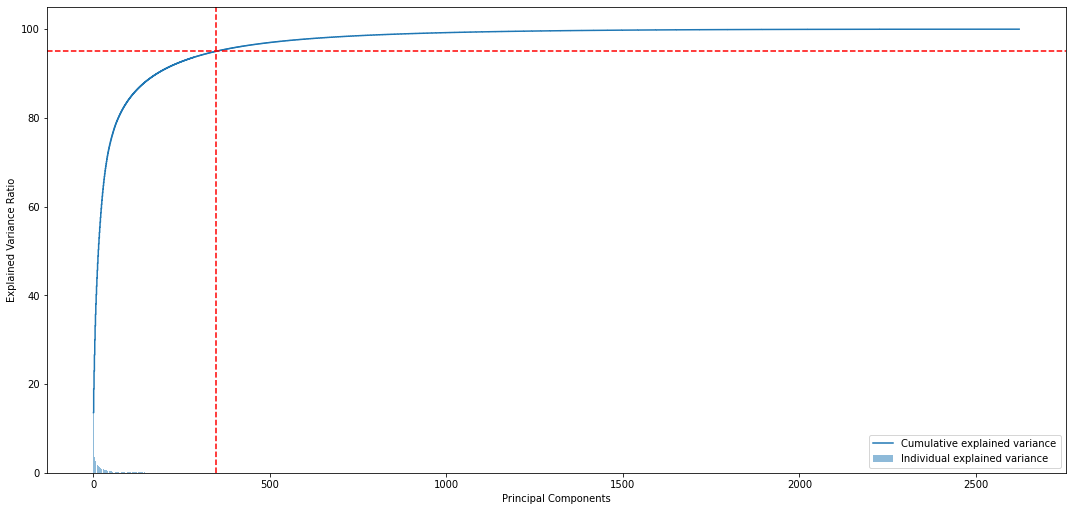

In [39]:
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = thres, color = 'r', linestyle = '--')
plt.axvline(x = index, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [40]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_pca,y_train_en)

SVC()

In [41]:
print('SVC accuracy for train set: {0:.3f}'.format(svc.score(X_train_pca, y_train_en)))


SVC accuracy for train set: 0.998


In [42]:
svc.score(X_test_pca,y_test_en)


0.9674185463659147

In [43]:
y_pred = svc.predict(X_test_pca)
y_pred

array([98, 11, 11, ..., 10, 10, 10])

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

names = [name.split('_')[1].title().strip() for name in labels]

# Classification Report
print('Classification Report: \n{}'.format(classification_report(y_test_en, y_pred, target_names = np.unique(names))))

Classification Report: 
                          precision    recall  f1-score   support

              Aaron Paul       0.91      1.00      0.95        10
      Alexandra Daddario       1.00      1.00      1.00        10
            Alvaro Morte       1.00      0.85      0.92        13
Alycia Debnam Carey Face       1.00      1.00      1.00        13
             Amanda Crew       1.00      1.00      1.00         8
          Amaury Nolasco       1.00      1.00      1.00         9
        Amber Heard Face       1.00      1.00      1.00         8
               Anna Gunn       1.00      0.93      0.97        15
           Anne Hathaway       1.00      1.00      1.00        14
     Barbara Palvin Face       1.00      1.00      1.00         8
      Bellamy Blake Face       1.00      0.93      0.96        14
    Benedict Cumberbatch       0.92      0.92      0.92        13
            Betsy Brandt       1.00      1.00      1.00         9
              Bill Gates       0.77      1.00      

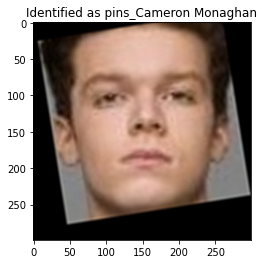

In [45]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_image_scal = scal.transform([embeddings[test_idx][example_idx]])
example_image_pca = pca.transform(example_image_scal)
example_prediction = svc.predict(example_image_pca)
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

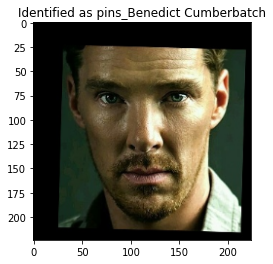

In [190]:
import warnings
warnings.filterwarnings('ignore')
test_img_path ="/content/gdrive/MyDrive/AIML/LABS/Computer Vision/Project 2/Benedict+Cumberbatch9.jpg"

sample_img = load_image(test_img_path)
sample_img = (sample_img/255.).astype(np.float32)
  # Resize
sample_img = cv2.resize(sample_img, (224, 224))

sample_image_scal = scal.transform([embeddings[test_idx][1110]])
sample_image_pca = pca.transform(sample_image_scal)
sample_prediction = svc.predict(sample_image_pca)
sample_identity = le.inverse_transform(sample_prediction)[0]

plt.imshow(sample_img)
plt.title(f'Identified as {sample_identity}');

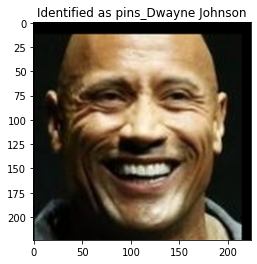

In [191]:
import warnings
warnings.filterwarnings('ignore')
test_img_path ="/content/gdrive/MyDrive/AIML/LABS/Computer Vision/Project 2/Dwayne+Johnson4.jpg"

sample_img = load_image(test_img_path)
sample_img = (sample_img/255.).astype(np.float32)
  # Resize
sample_img = cv2.resize(sample_img, (224, 224))

sample_image_scal = scal.transform([embeddings[test_idx][130]])
sample_image_pca = pca.transform(sample_image_scal)
sample_prediction = svc.predict(sample_image_pca)
sample_identity = le.inverse_transform(sample_prediction)[0]

plt.imshow(sample_img)
plt.title(f'Identified as {sample_identity}');

In [194]:
%%shell
jupyter nbconvert --to html ///content/Part_C_of_CV2.ipynb

[NbConvertApp] WARNING | pattern '///content/Part_C_of_CV2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]


CalledProcessError: ignored